In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
BATCH_SIZE = 32
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/cat-and-dog/training_set/training_set/",
  validation_split=0.2,
  labels='inferred',
  label_mode = 'binary',
  subset="training",
  seed=123,
  class_names = ['cats', 'dogs'],
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [5]:
CLASSES = train_ds.class_names
print(CLASSES)

['cats', 'dogs']


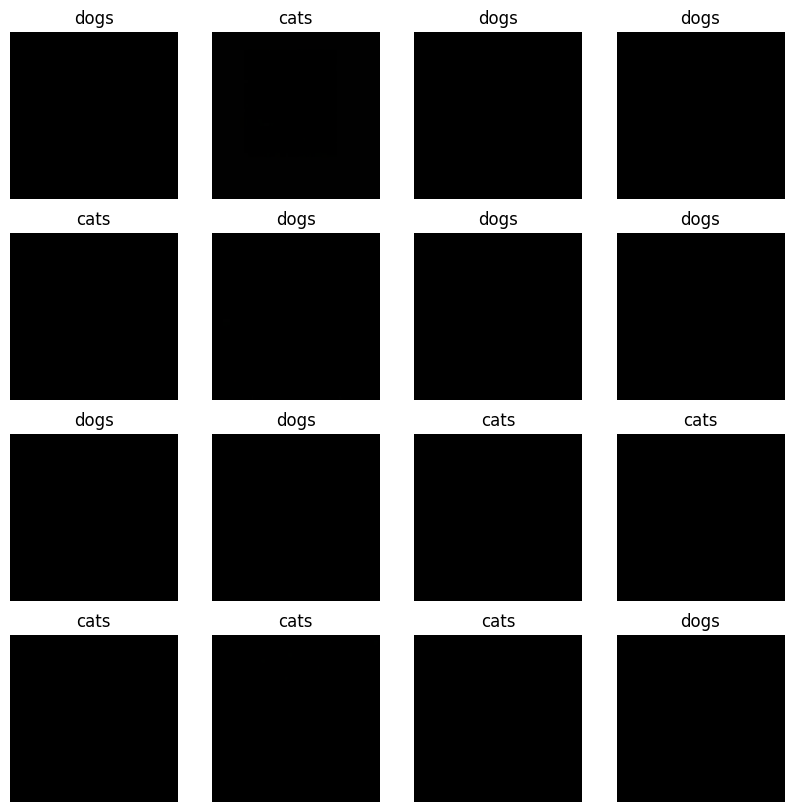

In [14]:
import matplotlib.pyplot as plt

# Define a function to display images
def display_images(dataset, rescale=False):
    plt.figure(figsize=(10, 10))
    for image, labels in dataset.take(1):
        for i in range(16):
            label_idx = int(labels[i].numpy())
            ax = plt.subplot(4, 4, i + 1)
            if rescale:
                plt.imshow(image[i].numpy())
            else:
                plt.imshow(image[i].numpy().astype("uint8"))
            plt.title(CLASSES[label_idx])
            plt.axis("off")
    plt.show()

# Display images without rescaling
display_images(train_ds)

In [7]:
def image_rescaling(image, label):
    return image/255, label

In [8]:
train_ds = train_ds.map(image_rescaling)

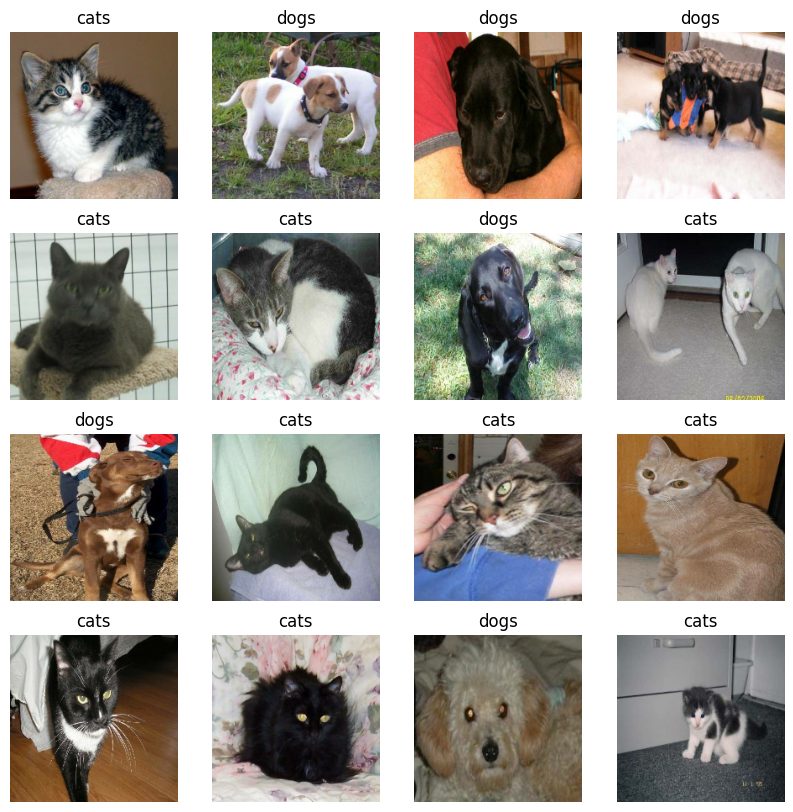

In [15]:
display_images(train_ds, rescale=True)